# A classification example using Generalized Additive Models with pyGAM

[Generalized additive models](https://en.wikipedia.org/wiki/Generalized_additive_model) combine [generalized linear models](https://en.wikipedia.org/wiki/Generalized_linear_model) with [additive models](https://en.wikipedia.org/wiki/Additive_model). For an excellent introduction see ["A Tour of pyGAM"](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html).

### Install `pyGAM`

In [1]:
!pip install pygam

     |████████████████████████████████| 1.8 MB 1.2 MB/s 


### set up some simple Titanic competition data
No feature engineering or anything; just enough to get us going...

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt

#===========================================================================
# read in the data
#===========================================================================
train_data = pd.read_csv('../input/titanic/train.csv')
test_data  = pd.read_csv('../input/titanic/test.csv')

#===========================================================================
# select some features of interest ("ay, there's the rub", Shakespeare)
#===========================================================================
features = ["Pclass", "Sex", "SibSp", "Parch"]

#===========================================================================
# for the features that are categorical we use pd.get_dummies:
# "Convert categorical variable into dummy/indicator variables."
#===========================================================================
X_train       = pd.get_dummies(train_data[features])
y_train       = train_data["Survived"]
final_X_test  = pd.get_dummies(test_data[features])

### perform the classification
Here we use `LogisticGAM`, which uses a logit link function and binomial distribution, with four spline terms, `s(0)...s(3)`, for each of the four features:

In [3]:
from pygam import LogisticGAM, s, f

classifier = LogisticGAM(s(0) + s(1) + s(2) + s(3))

classifier.fit(X_train, y_train)

#===========================================================================
# use the model to predict 'Survived' for the test data
#===========================================================================
predictions = classifier.predict(final_X_test)

# convert from True/False to 1/0
predictions = (predictions)*1

### produce a summary

In [4]:
classifier.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      13.174
Link Function:                        LogitLink Log Likelihood:                                  -396.7965
Number of Samples:                          891 AIC:                                               819.941
                                                AICc:                                             820.4322
                                                UBRE:                                               2.9321
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3312
Feature Function                  Lam

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


### visualize each individual feature function
Here each of the four spline functions:

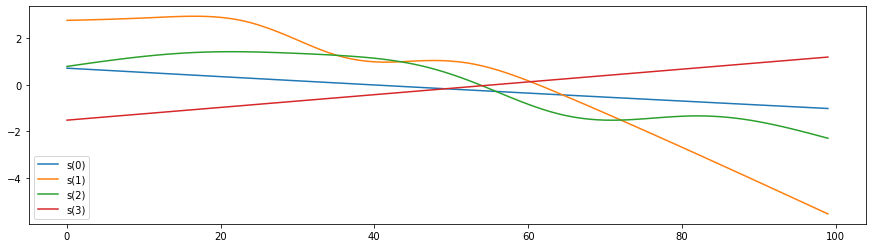

In [5]:
plt.figure(figsize=(15, 4))
for i, term in enumerate(classifier.terms):
    if term.isintercept:
        continue
    plt.plot(classifier.partial_dependence(term=i), label="s({})".format(i))
    plt.legend()

### finally write out a `submission.csv` file

In [6]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

# Links
* [pyGAM](https://github.com/dswah/pyGAM) on GitHub
* [pyGAM documentation](https://pygam.readthedocs.io/en/latest/index.html)
* [Daniel Servén and Charlie Brummitt "pyGAM: Generalized Additive Models in Python", Zenodo (2018)](http://dx.doi.org/10.5281/zenodo.1208723)

# Further reading
* [Trevor Hastie and Robert Tibshirani "Generalized Additive Models", Statistical Science Vol. 1 pp. 297-310 (1986)](https://projecteuclid.org/download/pdf_1/euclid.ss/1177013604)
* ["Generalized Additive Models" by Michael Clark](https://m-clark.github.io/generalized-additive-models/)